In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.cm


mu = -0.1
tau = 1
sigma = 10
n = 5_000_000

### Costs First

In [49]:
C = np.linspace(0,0.01,100)

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/var/folders/gc/wdmtwr2d6zd6mgxqyn23rjmc0000gn/T/ipykernel_63073/442981884.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Cost (Multiples of |$\mu$|)')


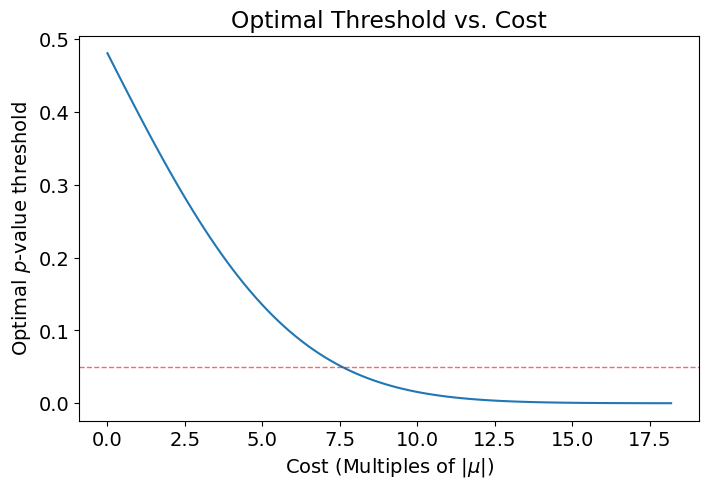

In [51]:
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize = (8,5))

thresholds = C*np.sqrt(n)/sigma + (C - mu)*sigma/(np.sqrt(n)*tau**2)
plt.plot(C/np.abs(mu), stats.norm.cdf(-thresholds))


plt.ylabel('Optimal $p$-value threshold')
plt.xlabel('Cost (Multiples of |$\mu$|)')

plt.axhline(0.05, alpha = 0.6, color = 'red', linestyle = 'dashed', linewidth = 1)
plt.title('Optimal Threshold vs. Cost')
plt.savefig('../../figures/backing_out_costs.pdf',bbox_inches = 'tight')

In [36]:
s = np.sqrt(((tau**2)*sigma**2/n)/(tau**2 + sigma**2/n))
bs = np.array([0,0.75,2,4,8,15,40,80]).astype(float)
pval_thresholds = np.zeros_like(bs)

for i,b in enumerate(bs):
  pm = lambda x: x*tau**2/(tau**2 +sigma**2/n) + mu*(sigma**2/n)/(tau**2 + sigma**2/n)
  f = lambda x: pm(x)*(1 + b*scipy.stats.norm.cdf(-pm(x)/s)) - scipy.stats.norm.pdf(pm(x)/s)*b*s

  from scipy.optimize import fsolve
  res = fsolve(f, [-0.05, 0.05])

  pval_thresholds[i] = scipy.stats.norm.cdf(-res[0]*np.sqrt(n)/sigma)

In [37]:
pval_thresholds

array([0.48069361, 0.38115366, 0.29270906, 0.21976353, 0.15151402,
       0.10109293, 0.04830619, 0.02690533])

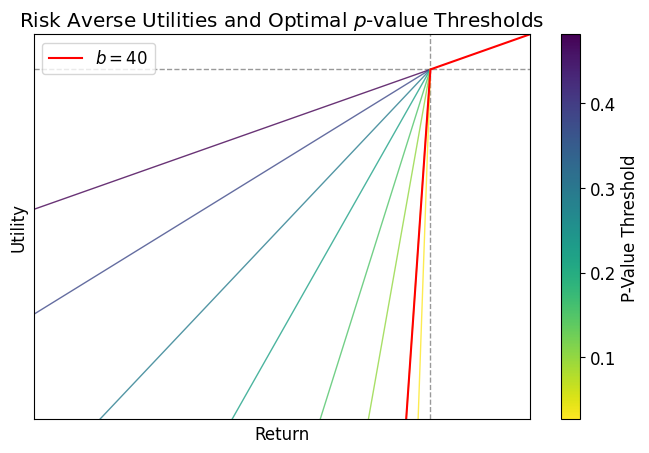

In [38]:
matplotlib.rcParams.update({'font.size': 12})

# Get a colormap (e.g., 'viridis', 'plasma', etc.)
cmap = plt.get_cmap('viridis_r')  # You can choose a different colormap if preferred

# Normalize the pval_thresholds to match the colormap scale
norm = plt.Normalize(vmin=min(pval_thresholds), vmax=max(pval_thresholds))

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))
plt.xlim(-0.20, 0.05)
plt.ylim(-0.5, 0.05)
plt.axvline(0, linestyle='dashed', alpha=0.4, color='black', linewidth=1)
plt.axhline(0, linestyle='dashed', alpha=0.4, color='black', linewidth=1)

xs = np.linspace(-0.25, 0, 5000)

# Plot each line with color from the colormap based on pval_thresholds
for i, b in enumerate(bs):
    color = cmap(norm(pval_thresholds[i]))  # Get color based on pval_thresholds
    plt.plot(xs, xs + b * xs * (xs < 0), color=color, alpha = 0.8, linewidth = 1)

xs = np.linspace(-0.25, 0.25, 5000)
color = cmap(norm(40))
plt.plot(xs, xs + 40 * xs * (xs < 0), color='red', alpha = 1, linewidth = 1.5, label = '$b = 40$')

# Show color bar for reference
plt.title('Risk Averse Utilities and Optimal $p$-value Thresholds')
plt.ylabel('Utility')
plt.xlabel('Return')
plt.xticks([])
plt.yticks([])
plt.legend()

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Add this line to associate the ScalarMappable with the plot
plt.colorbar(sm, ax=ax, label='P-Value Threshold')

plt.savefig('../../figures/backing_out_utilities.pdf',bbox_inches = 'tight')
plt.show()